Лабораторная работа по модулю “Построение моделей”

В данной работе предлагается решить задачу мультиклассовойклассификации для датасета флагов различных стран (https://archive.ics.uci.edu/ml/datasets/Flags)

1. Загрузить данные из папки Data Folder
2. Провести описательный анализ предложенных данных
3. Предложить стратегию по работе с категориальными переменными 
4. Провести углубленный анализ данных (корреляции переменных,визуализация взаимосвязей)
5. Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты)
6. Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты)
7. Сделать кросс-валидациюданных с использованием подхода K-fold (n_folds=3)
8. Решить задачу мультиклассовойклассификации и предсказать религию страны(religion)по деталям ее флага 
9. РассчитатьFeature Importancesдля переменных модели
10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall
11. Построить Confusion Matrix для ваших результатов
12. Загрузить ipythonnotebook с результатами работы на githubрепозиторий
*Пункты,показавшиеся вам сложными,либо которые вы не знаете можно пропускать,но с пометкой в ноутбуке,чтопоказалось сложным и непонятным в данном пункте для вас

Dataset description:
Attribute Information:
1. name	Name of the country concerned
2. landmass	1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone	Geographic quadrant, based on Greenwich and the Equator 1=NE, 2=SE, 3=SW, 4=NW
4. area	in thousands of square km
5. population	in round millions
6. language 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu,5=Ethnic, 6=Marxist, 7=Others
8. bars     Number of vertical bars in the flag
9. stripes  Number of horizontal stripes in the flag
10. colours  Number of different colours in the flag
11. red      0 if red absent, 1 if red present in the flag
12. green    same for green
13. blue     same for blue
14. gold     same for gold (also yellow)
15. white    same for white
16. black    same for black
17. orange   same for orange (also brown)
18. mainhue  predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles  Number of circles in the flag
20. crosses  Number of (upright) crosses
21. saltires Number of diagonal crosses
22. quarters Number of quartered sections
23. sunstars Number of sun or star symbols
24. crescent 1 if a crescent moon symbol present, else 0
25. triangle 1 if any triangles present, 0 otherwise
26. icon     1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate  1 if an animate image (e.g., an eagle, a tree, a human hand)  present, 0 otherwise
28. text     1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft  colour in the top-left corner (moving right to decide tie-breaks)
30. botright Colour in the bottom-left corner (moving left to decide tie-breaks)

No missing values

In [1]:
cols = ['name','landmass','zone','area','population','language','religion','bars','stripes',
       'colours','red','green','blue','gold','white','black','orange','mainhue','circles',
       'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate',
       'text','topleft','botright']

In [2]:
import pandas as pd
data = pd.read_csv('../Desktop/flag.data',header=None,names=cols)
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        194 non-null    object
 1   landmass    194 non-null    int64 
 2   zone        194 non-null    int64 
 3   area        194 non-null    int64 
 4   population  194 non-null    int64 
 5   language    194 non-null    int64 
 6   religion    194 non-null    int64 
 7   bars        194 non-null    int64 
 8   stripes     194 non-null    int64 
 9   colours     194 non-null    int64 
 10  red         194 non-null    int64 
 11  green       194 non-null    int64 
 12  blue        194 non-null    int64 
 13  gold        194 non-null    int64 
 14  white       194 non-null    int64 
 15  black       194 non-null    int64 
 16  orange      194 non-null    int64 
 17  mainhue     194 non-null    object
 18  circles     194 non-null    int64 
 19  crosses     194 non-null    int64 
 20  saltires  

In [4]:
black_list = ['name'] #we balck list country name as with it we need just wiki to predicit religion
categoricals = ['landmass','zone','language','mainhue','topleft','botright']
dummies = ['red','green','blue','gold','white','black','orange','crescent','triangle','icon','animate','text']
continious = ['area', 'population', 'bars', 'stripes', 'colours','circles', 'crosses', 'saltires', 'quarters', 'sunstars']
target = 'religion'

In [130]:
data[continious].describe()
#strange that area and population can be 0

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,700.046392,23.268041,0.453608,1.551546,3.463918,0.170103,0.149485,0.092784,0.149485,1.386598
std,2170.927932,91.934085,1.038339,2.328005,1.300154,0.463075,0.385387,0.290879,0.435860,4.396186
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,111.000000,4.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,471.250000,14.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,22402.000000,1008.000000,5.000000,14.000000,8.000000,4.000000,2.000000,1.000000,4.000000,50.000000


In [6]:
data[data.area == 0]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
15,Barbados,1,4,0,0,1,1,3,0,3,...,0,0,0,0,0,1,0,0,blue,blue
19,Bermuda,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,0,white,red
24,British-Virgin-Isles,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,1,white,blue
33,Cayman-Islands,1,4,0,0,1,1,0,0,6,...,1,1,4,0,0,1,1,1,white,blue
41,Cook-Islands,6,3,0,0,1,1,0,0,4,...,1,1,15,0,0,0,0,0,white,blue
48,Dominica,1,4,0,0,1,1,0,0,6,...,0,0,10,0,0,0,1,0,green,green


In [7]:
data[data.population==0]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
12,Bahamas,1,4,19,0,1,1,0,3,3,...,0,0,0,0,1,0,0,0,blue,blue
13,Bahrain,5,1,1,0,8,2,0,0,2,...,0,0,0,0,0,0,0,0,white,red
15,Barbados,1,4,0,0,1,1,3,0,3,...,0,0,0,0,0,1,0,0,blue,blue
17,Belize,1,4,23,0,1,1,0,2,8,...,0,0,0,0,0,1,1,1,red,red
19,Bermuda,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,0,white,red
24,British-Virgin-Isles,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,1,white,blue


Area and population equal to 0 looks fine, coutnries are usually small, so value was just rounded

In [131]:
import numpy as np
np.sum(data[dummies].max()!=1) + np.sum(data[dummies].min()!=0)

0

Dummies are fair

In [9]:
data[dummies].agg(['min','max', 'nunique'])

,red,green,blue,gold,white,black,orange,crescent,triangle,icon,animate,text
min,0,0,0,0,0,0,0,0,0,0,0,0
max,1,1,1,1,1,1,1,1,1,1,1,1
nunique,2,2,2,2,2,2,2,2,2,2,2,2


In [10]:
dummies

['red',
 'green',
 'blue',
 'gold',
 'white',
 'black',
 'orange',
 'crescent',
 'triangle',
 'icon',
 'animate',
 'text']

In [132]:
total = 0
for cat in categoricals:
    total += len(data[cat].unique())
    print(cat,len(data[cat].unique()))
print('Total:',total)

landmass 6
zone 4
language 10
mainhue 8
topleft 7
botright 8
Total: 43


Overall number of catergoricals is not high => we can use one-hot encoding

In [133]:
import seaborn as sbs

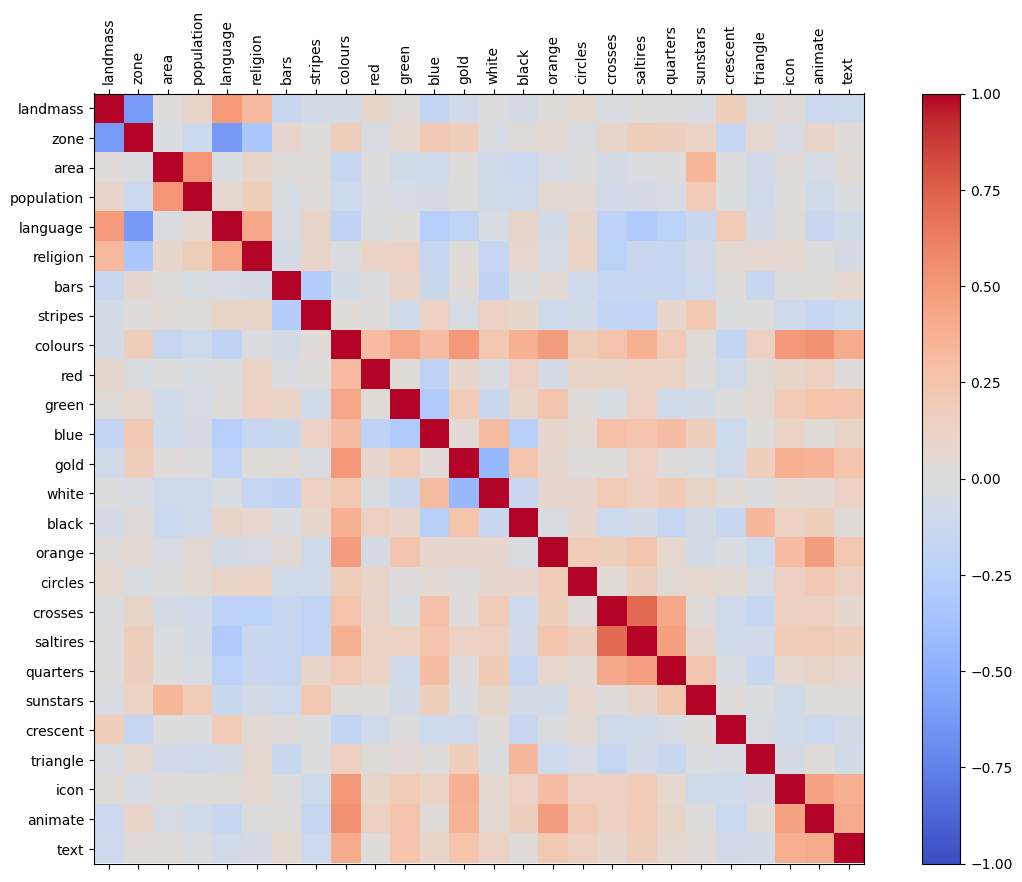

In [134]:
import matplotlib.pyplot as plt

corr = data.drop(columns=['name','topleft','botright','mainhue']).corr()
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.index)
ax.set_yticklabels(corr.columns)
plt.show()

Religion is most correletaed with landmass,bars,red,green,gold

In [138]:
data[continious]

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars
0,648,16,0,3,5,0,0,0,0,1
1,29,3,0,0,3,0,0,0,0,1
2,2388,20,2,0,3,0,0,0,0,1
3,0,0,0,0,5,0,0,0,0,0
4,0,0,3,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
189,3,0,0,0,3,0,0,0,1,5
190,256,22,0,3,4,0,0,0,0,1
191,905,28,0,0,4,1,0,0,0,0
192,753,6,3,0,4,0,0,0,0,0


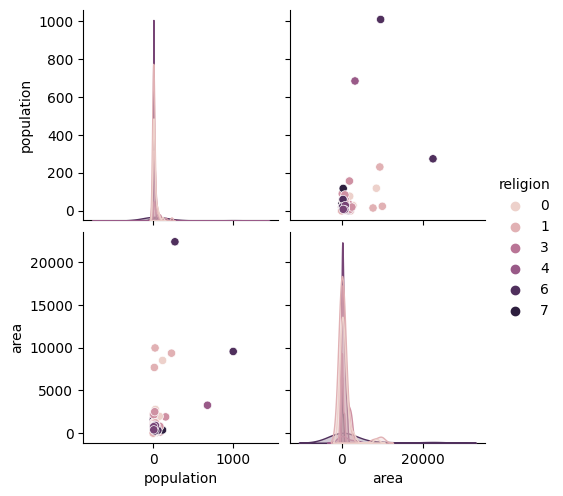

In [142]:
_ = sbs.pairplot(data = data,vars=['population','area'], hue='religion')

Out of plot above we can see some correlations between colors/bars and target variable, but to separate weel one religion from another we need to feed more features

In [143]:
y = data[target]

In [144]:
y.value_counts() #classes are heavily imbalanced

religion
1    60
0    40
2    36
5    27
6    15
3     8
4     4
7     4
Name: count, dtype: int64

# Data preparation

In [145]:
X = pd.concat([data[continious],data[dummies],pd.get_dummies(data[categoricals])],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   area             194 non-null    int64
 1   population       194 non-null    int64
 2   bars             194 non-null    int64
 3   stripes          194 non-null    int64
 4   colours          194 non-null    int64
 5   circles          194 non-null    int64
 6   crosses          194 non-null    int64
 7   saltires         194 non-null    int64
 8   quarters         194 non-null    int64
 9   sunstars         194 non-null    int64
 10  red              194 non-null    int64
 11  green            194 non-null    int64
 12  blue             194 non-null    int64
 13  gold             194 non-null    int64
 14  white            194 non-null    int64
 15  black            194 non-null    int64
 16  orange           194 non-null    int64
 17  crescent         194 non-null    int64
 18  triangle  

In [146]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1,test_size=.2)
for trn_idx,tst_idx in sss.split(X,y):
    X_train,y_train = X.iloc[trn_idx],y.iloc[trn_idx]
    X_test,y_test = X.iloc[tst_idx],y.iloc[tst_idx]
    
assert len(X_train)+len(X_test) == len(y_train)+len(y_test) == len(X) == len(y)

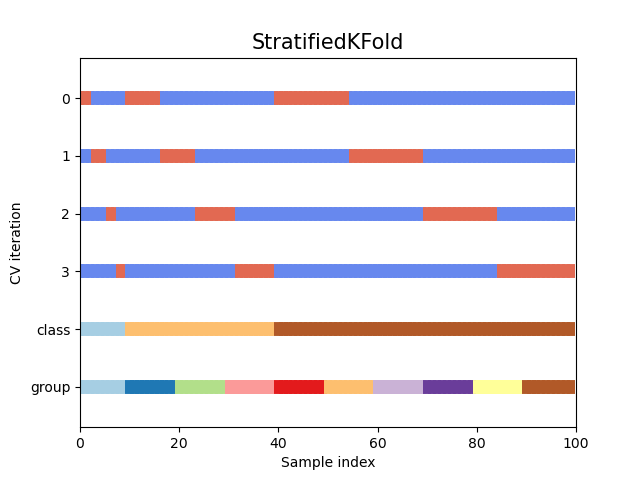

# Baseline model

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
rfc = RandomForestClassifier(max_depth=20,min_samples_leaf=5,n_estimators=100,n_jobs=-1,random_state=42)

score_on_train = 0
for trn_idx,tst_idx in KFold(n_splits=3,random_state=42, shuffle=True).split(X_train,y_train):
    X_train_fold,y_train_fold = X.iloc[trn_idx],y.iloc[trn_idx]
    X_test_fold,y_test_fold = X.iloc[tst_idx],y.iloc[tst_idx]
    rfc.fit(X_train_fold,y_train_fold)
    score_on_train += rfc.score(X_test_fold,y_test_fold)

rfc.fit(X_train,y_train)
print (score_on_train/3)
print(rfc.score(X_test,y_test))

0.574660633484163
0.6666666666666666


# Feature space

In [148]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=3,interaction_only=True,include_bias=False)
X_poly = pd.concat([pd.DataFrame(pf.fit_transform(X[continious])),data[dummies],pd.get_dummies(data[categoricals])],axis=1)
X_poly.head()

,0,1,2,3,4,5,6,7,8,9,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,648.0,16.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,True,False,False,False
1,29.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,...,True,False,False,False,False,False,False,False,True,False
2,2388.0,20.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,True
3,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False


In [151]:
for trn_idx,tst_idx in sss.split(X_poly,y):
    X_train_poly,y_train_poly = X_poly.iloc[trn_idx],y.iloc[trn_idx]
    X_test_poly,y_test_poly = X_poly.iloc[tst_idx],y.iloc[tst_idx]

In [157]:
X_poly.columns = X_poly.columns.astype(str)
X_poly.columns = X_poly.columns.astype(str)

In [158]:
rfc = RandomForestClassifier(max_depth=20,min_samples_leaf=5,n_estimators=100,n_jobs=-1,random_state=42)
X_train_poly.columns = X_train_poly.columns.astype(str)
X_test_poly.columns = X_test_poly.columns.astype(str)
score_on_train = 0
for trn_idx,tst_idx in KFold(n_splits=3,random_state=42, shuffle=True).split(X_train_poly,y_train_poly):
    X_train_fold,y_train_fold = X_poly.iloc[trn_idx],y.iloc[trn_idx]
    X_test_fold,y_test_fold = X_poly.iloc[tst_idx],y.iloc[tst_idx]
    
    rfc.fit(X_train_fold,y_train_fold)
    score_on_train += rfc.score(X_test_fold,y_test_fold)

rfc.fit(X_train_poly,y_train_poly)
print (score_on_train/3)
print(rfc.score(X_test_poly,y_test_poly))

0.5226244343891402
0.6410256410256411


In [161]:
model2 = LogisticRegression()
# rfc = RandomForestClassifier(max_depth=20,min_samples_leaf=5,n_estimators=100,n_jobs=-1,random_state=42)
X_train_poly.columns = X_train_poly.columns.astype(str)
X_test_poly.columns = X_test_poly.columns.astype(str)
score_on_train = 0
for trn_idx,tst_idx in KFold(n_splits=3,random_state=42, shuffle=True).split(X_train_poly,y_train_poly):
    X_train_fold,y_train_fold = X_poly.iloc[trn_idx],y.iloc[trn_idx]
    X_test_fold,y_test_fold = X_poly.iloc[tst_idx],y.iloc[tst_idx]
    
    model2.fit(X_train_fold,y_train_fold)
    score_on_train += rfc.score(X_test_fold,y_test_fold)

model2.fit(X_train_poly,y_train_poly)
print (score_on_train/3)
print(model2.score(X_test_poly,y_test_poly))

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

0.690422322775264
0.3333333333333333


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [162]:
from sklearn.decomposition import PCA
X_pca = pd.DataFrame(PCA(n_components=round(len(X.columns)/3)).fit_transform(X))

In [163]:
for trn_idx,tst_idx in sss.split(X_pca,y):
    X_train_pca,y_train_pca = X_pca.iloc[trn_idx],y.iloc[trn_idx]
    X_test_pca,y_test_pca = X_pca.iloc[tst_idx],y.iloc[tst_idx]

In [164]:
rfc = RandomForestClassifier(max_depth=20,min_samples_leaf=5,n_estimators=100,n_jobs=-1,random_state=42)

score_on_train = 0
for trn_idx,tst_idx in KFold(n_splits=3,random_state=42,shuffle=True).split(X_train_pca,y_train_pca):
    X_train_fold,y_train_fold = X_pca.iloc[trn_idx],y.iloc[trn_idx]
    X_test_fold,y_test_fold = X_pca.iloc[tst_idx],y.iloc[tst_idx]
    rfc.fit(X_train_fold,y_train_fold)
    score_on_train += rfc.score(X_test_fold,y_test_fold)

rfc.fit(X_train_pca,y_train_pca)
print (score_on_train/3)
print(rfc.score(X_test_pca,y_test_pca))

0.5037707390648567
0.48717948717948717


During these test both reduction and increasment of feature space didn't show improvements on validation score.

# Class balancing

## Oversampling

In [166]:
classes_count = y.value_counts()
max_class_count = classes_count.max()

X_over = X.copy()
y_over = y.copy()

In [167]:
from sklearn.model_selection import train_test_split
X_train_over,X_test_over,y_train_over,y_test_over = train_test_split(X_over,y_over,test_size=.2, random_state=42)

In [170]:
X_train_over = X_train_over.reset_index(drop=True)
y_train_over = y_train_over.reset_index(drop=True)

In [171]:
for cls in zip(classes_count,classes_count.index):
    if cls[0] != max_class_count:
        idx = np.random.choice(y_train_over[y_train_over==cls[1]].index,size = max_class_count-cls[0])
        X_add = X_train_over.iloc[idx]
        y_add = y_train_over.iloc[idx]
        X_train_over = pd.concat([X_train_over, X_add])
        y_train_over = pd.concat([y_train_over, y_add])

In [172]:
X_train_over = X_train_over.reset_index(drop=True)
y_train_over = y_train_over.reset_index(drop=True)

In [175]:
rfc = RandomForestClassifier(max_depth=20,min_samples_leaf=5,n_estimators=100,n_jobs=-1,random_state=42, 
                             class_weight='balanced')

score_on_train = 0
for trn_idx,tst_idx in KFold(n_splits=3,random_state=42, shuffle=True).split(X_train_over,y_train_over):
    X_train_fold,y_train_fold = X_train_over.iloc[trn_idx],y_train_over.iloc[trn_idx]
    X_test_fold,y_test_fold = X_train_over.iloc[tst_idx],y_train_over.iloc[tst_idx]
    rfc.fit(X_train_fold,y_train_fold)
    score_on_train += rfc.score(X_test_fold,y_test_fold)

rfc.fit(X_train_over, y_train_over)
print (score_on_train/3)
print(rfc.score(X_test_over,y_test_over))

0.8662131519274375
0.48717948717948717


Oversmapling shows good result on train and test and can be used

## Undersampling
I assume that it will not work well, as minor classes are very small and this technique will reduce dataset significantly

# Model training

In [180]:
from sklearn.model_selection import train_test_split
X_train_over,X_test_over,y_train_over,y_test_over = train_test_split(X,y,test_size=.2, random_state=42)

In [182]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,200,500,1000],
          'max_depth':[5,10,15,20,30],
          'min_samples_leaf':[1,5,10,20],
          'random_state':[42],
          'n_jobs':[-1]}

rf_grid = GridSearchCV(RandomForestClassifier(),param_grid=params,verbose=1,n_jobs=-1,cv=3)
rf_grid.fit(X_train_over, y_train_over)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


The least populated class in y has only 2 members, which is less than n_splits=3.


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 30],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 200, 500, 1000],
                         'n_jobs': [-1], 'random_state': [42]},
             verbose=1)

In [181]:
from sklearn.linear_model import LogisticRegression
params = {'penalty':['l2'],
          'max_iter':[100,500,1000],
          'multi_class':['multinomial'],
          'n_jobs':[-1],
          'C':[0.01,0.1,0.5,1.0],
          'solver':['newton-cg','sag','saga','lbfgs']}
lr_grid = GridSearchCV(LogisticRegression(),param_grid=params,verbose=1,n_jobs=-1,cv=3)
lr_grid.fit(X_train_over,y_train_over)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


The least populated class in y has only 2 members, which is less than n_splits=3.
/Users/aleksandrnemalcev/miniconda3/envs/nn/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aleksandrnemalcev/miniconda3/envs/nn/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aleksandrnemalcev/miniconda3/envs/nn/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aleksandrnemalcev/miniconda3/envs/nn/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aleksandrnemalcev/miniconda3/envs/nn/lib/python3.10/site-packages/sklearn/linea

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1.0],
                         'max_iter': [100, 500, 1000],
                         'multi_class': ['multinomial'], 'n_jobs': [-1],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']},
             verbose=1)

In [183]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
rf_pred = rf_grid.predict(X_test_over)
lr_pred = lr_grid.predict(X_test_over)
print (f"ACCURACY  : RF={accuracy_score(y_test_over,rf_pred):.3f}, LR={accuracy_score(y_test_over,lr_pred):.3f}")
print (f"F1-SCORE  : RF={f1_score(y_test_over,rf_pred,average='macro'):.3f}, LR={f1_score(y_test_over,lr_pred,average='macro'):.3f}")
print (f"PRECISION : RF={precision_score(y_test_over,rf_pred,average='macro'):.3f}, LR={precision_score(y_test_over,lr_pred,average='macro'):.3f}")
print (f"RECALL    : RF={recall_score(y_test_over,rf_pred,average='macro'):.3f}, LR={recall_score(y_test_over,lr_pred,average='macro'):.3f}")

ACCURACY  : RF=0.641, LR=0.410
F1-SCORE  : RF=0.429, LR=0.232
PRECISION : RF=0.489, LR=0.212
RECALL    : RF=0.481, LR=0.290


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [178]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
rf_pred = rf_grid.predict(X_test_over)
lr_pred = lr_grid.predict(X_test_over)
print (f"ACCURACY  : RF={accuracy_score(y_test_over,rf_pred):.3f}, LR={accuracy_score(y_test_over,lr_pred):.3f}")
print (f"F1-SCORE  : RF={f1_score(y_test_over,rf_pred,average='macro'):.3f}, LR={f1_score(y_test_over,lr_pred,average='macro'):.3f}")
print (f"PRECISION : RF={precision_score(y_test_over,rf_pred,average='macro'):.3f}, LR={precision_score(y_test_over,lr_pred,average='macro'):.3f}")
print (f"RECALL    : RF={recall_score(y_test_over,rf_pred,average='macro'):.3f}, LR={recall_score(y_test_over,lr_pred,average='macro'):.3f}")

ACCURACY  : RF=0.590, LR=0.359
F1-SCORE  : RF=0.389, LR=0.195
PRECISION : RF=0.395, LR=0.199
RECALL    : RF=0.417, LR=0.210


Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


Микро-усреднение (micro average) вычисляет метрики путем усреднения результатов по всем классам. Это означает, что каждый пример данных имеет одинаковый вес в вычислении метрик, независимо от того, к какому классу он относится. Таким образом, микро-усреднение позволяет оценить общую производительность модели на всех классах.

Макро-усреднение (macro average) вычисляет метрики путем усреднения результатов по каждому классу. Это означает, что каждый класс имеет одинаковый вес в вычислении метрик, независимо от количества примеров данных, относящихся к этому классу. Таким образом, макро-усреднение позволяет оценить производительность модели на каждом классе отдельно.

В целом, микро-усреднение подходит для задач, в которых классы несбалансированы, а макро-усреднение - для задач, в которых классы имеют примерно одинаковую важность.

Random Forest algorithm shows better perfomance accors all metrics => choose it

In [184]:
rf_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'n_estimators': 100,
 'n_jobs': -1,
 'random_state': 42}

In [185]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_over,rf_pred)

array([[ 5,  0,  0,  0,  0,  0,  0],
       [ 1, 12,  1,  0,  0,  2,  0],
       [ 0,  0,  3,  0,  0,  1,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0],
       [ 0,  0,  2,  0,  0,  4,  0],
       [ 2,  0,  1,  1,  0,  0,  1]])

Our classifier is marking:
1. Catholics as Other Christian
2. Ethnic as Other Christian or Muslim
3. Marxist as Catholic

All in all error are quite rare and in some cases can be explained by cultural similarity

In [195]:
X_train_over = X_train_over.astype('int64')

In [196]:
rf_best = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, n_estimators = 1000, n_jobs= -1, random_state= 42)
rf_best.fit(X_train_over,y_train_over)

RandomForestClassifier(max_depth=10, n_estimators=1000, n_jobs=-1,
                       random_state=42)

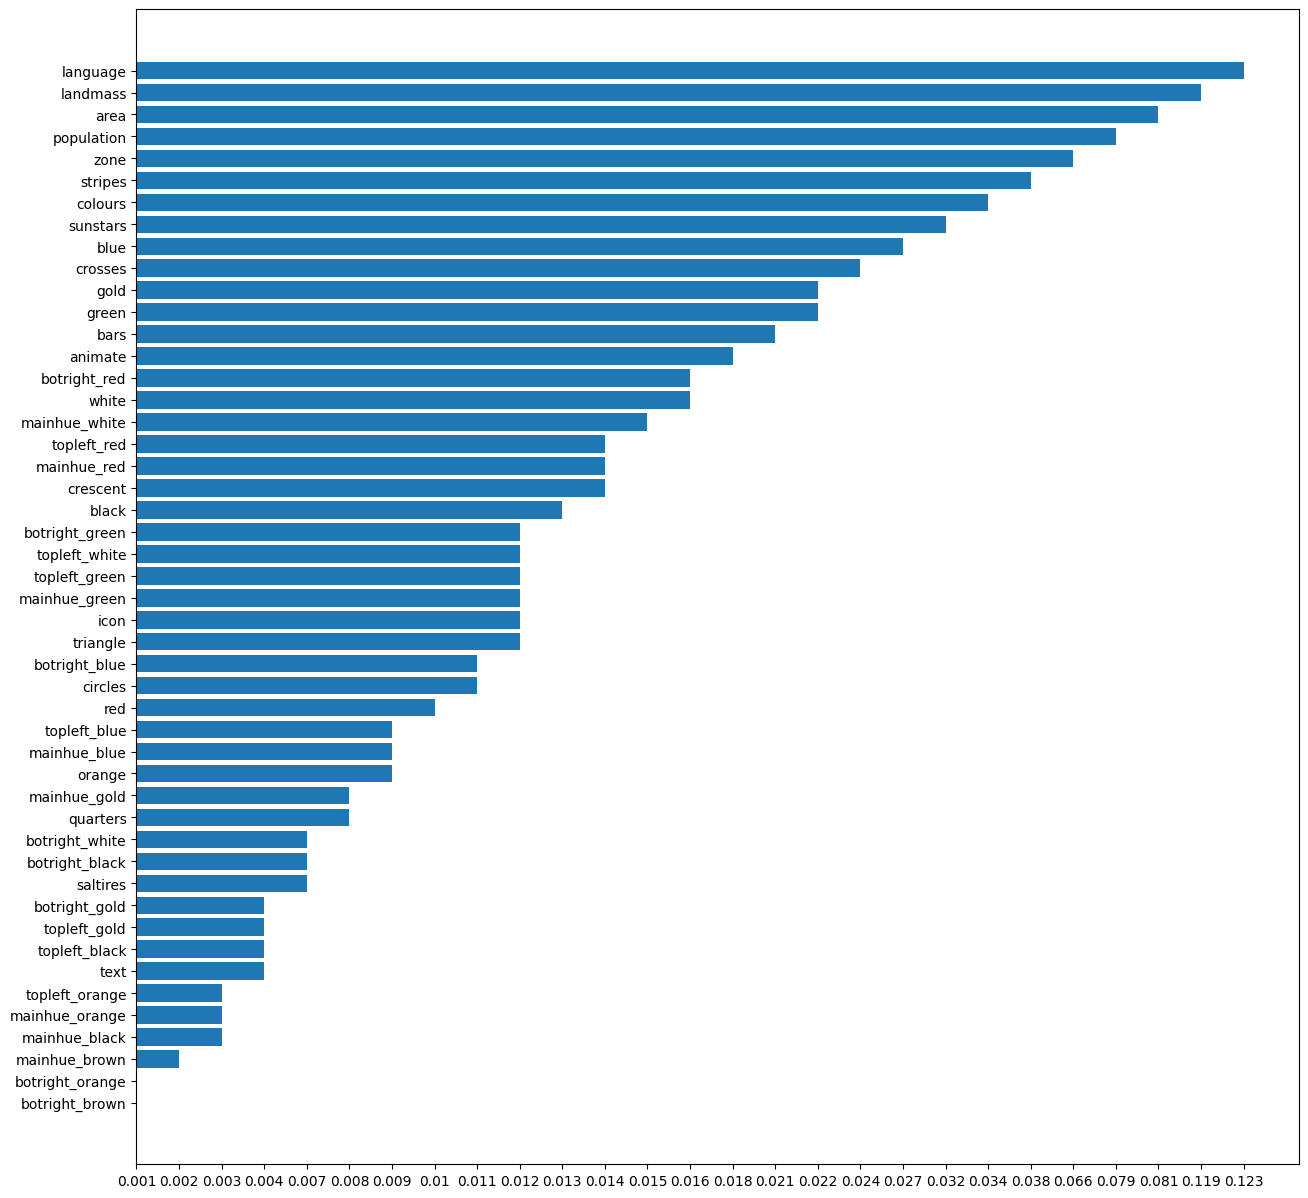

In [197]:
feat_imp_dict = {col:np.round(imp,3) for col,imp in zip(X_over.columns,rf_best.feature_importances_)}
feat_imp_dict = np.array(sorted(feat_imp_dict.items(),key=lambda x:x[1]))
labels = list(feat_imp_dict[:,0])
importances = list(feat_imp_dict[:,1])
y_pos = np.arange(len(labels))

plt.figure(figsize=(15,15))
plt.barh(y_pos,importances,align='center')
plt.yticks(y_pos, labels)
_ = plt.show()

Feature importance plot match with natural understanding of topic: language, location, area and population are most contirbuting features. At the same time there is no real leader - contribution is quite shared accross features, which is good for model prediction power and explainability.

In [191]:
!pip install -q shap


In [192]:
!pip install --upgrade pip

In [198]:
import shap


explainer = shap.TreeExplainer(rf_best)
shap_values = explainer(X_train_over)


In the future `np.bool` will be defined as the corresponding NumPy scalar.


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
choosen_instance = X_train_over.loc[[1]]
shap_values = explainer.shap_values(choosen_instance)



In [ ]:
shap.summary_plot(shap_values, X_train_over)